<a href="https://www.kaggle.com/code/cirillafiona/hw1-indian-pine?scriptVersionId=122669365" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.io import loadmat
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-pines/Indian_pines_corrected.mat
/kaggle/input/indian-pines/Indian_pines_gt.mat


In [2]:
def LoadData():
    data_path = '../input/'
    data = loadmat(os.path.join(data_path, 'indian-pines/Indian_pines_corrected.mat'))['indian_pines_corrected']
    labels = loadmat(os.path.join(data_path, 'indian-pines/Indian_pines_gt.mat'))['indian_pines_gt']  
    return data, labels

In [3]:
# if __name__ == '__main__':
#     # 读取数据
#     data, label = LoadData()
#     data = data.reshape(-1, 200)
#     label = label.reshape(-1, )
#     data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.3, random_state=42)
# #     rfc = RandomForestClassifier(class_weight='balanced',random_state=37)
#     rfc = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=42)
#     rfc = rfc.fit(data_train, label_train)
#     score_train = rfc.score(data_train, label_train)
#     score_test = rfc.score(data_test, label_test)
#     print("随机森林：" + "训练集：" + str(score_train) + " 测试集：" + str(score_test))

In [4]:
if __name__ == '__main__':
    # 读取数据
    data, labels = LoadData()
    # 打印数据和标签的形状
    print(f"Data shape: {data.shape}")
    print(f"Labels shape: {labels.shape}")
    
    X = data.reshape(-1, 200)
    y = labels.reshape(-1, )

    # 将数据分成训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # 创建一个随机森林分类器
    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # 在训练集上训练分类器
    rf.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred = rf.predict(X_test)

    # 打印分类报告和混淆矩阵
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Data shape: (145, 145, 200)
Labels shape: (145, 145)
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3265
           1       1.00      0.79      0.88        14
           2       0.79      0.74      0.76       442
           3       0.85      0.69      0.76       262
           4       0.75      0.53      0.62        73
           5       0.90      0.76      0.82       117
           6       0.92      0.72      0.81       209
           7       0.89      0.67      0.76        12
           8       0.92      0.95      0.93       129
           9       0.00      0.00      0.00         4
          10       0.80      0.79      0.80       285
          11       0.74      0.89      0.81       692
          12       0.72      0.57      0.64       178
          13       0.98      0.89      0.93        61
          14       0.72      0.45      0.55       417
          15       0.00      0.00      0.00       125
          16       0.82     

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


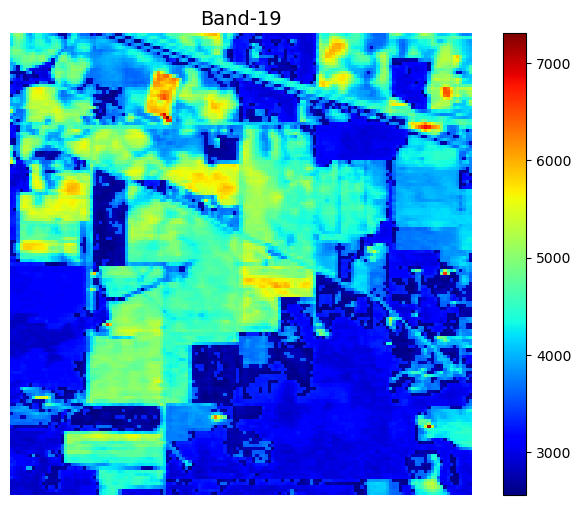

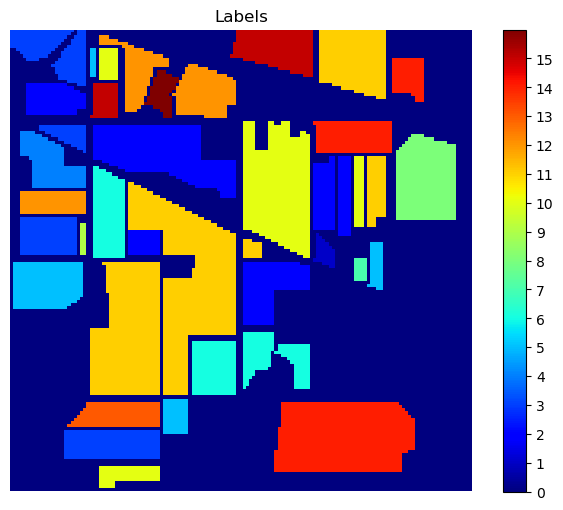

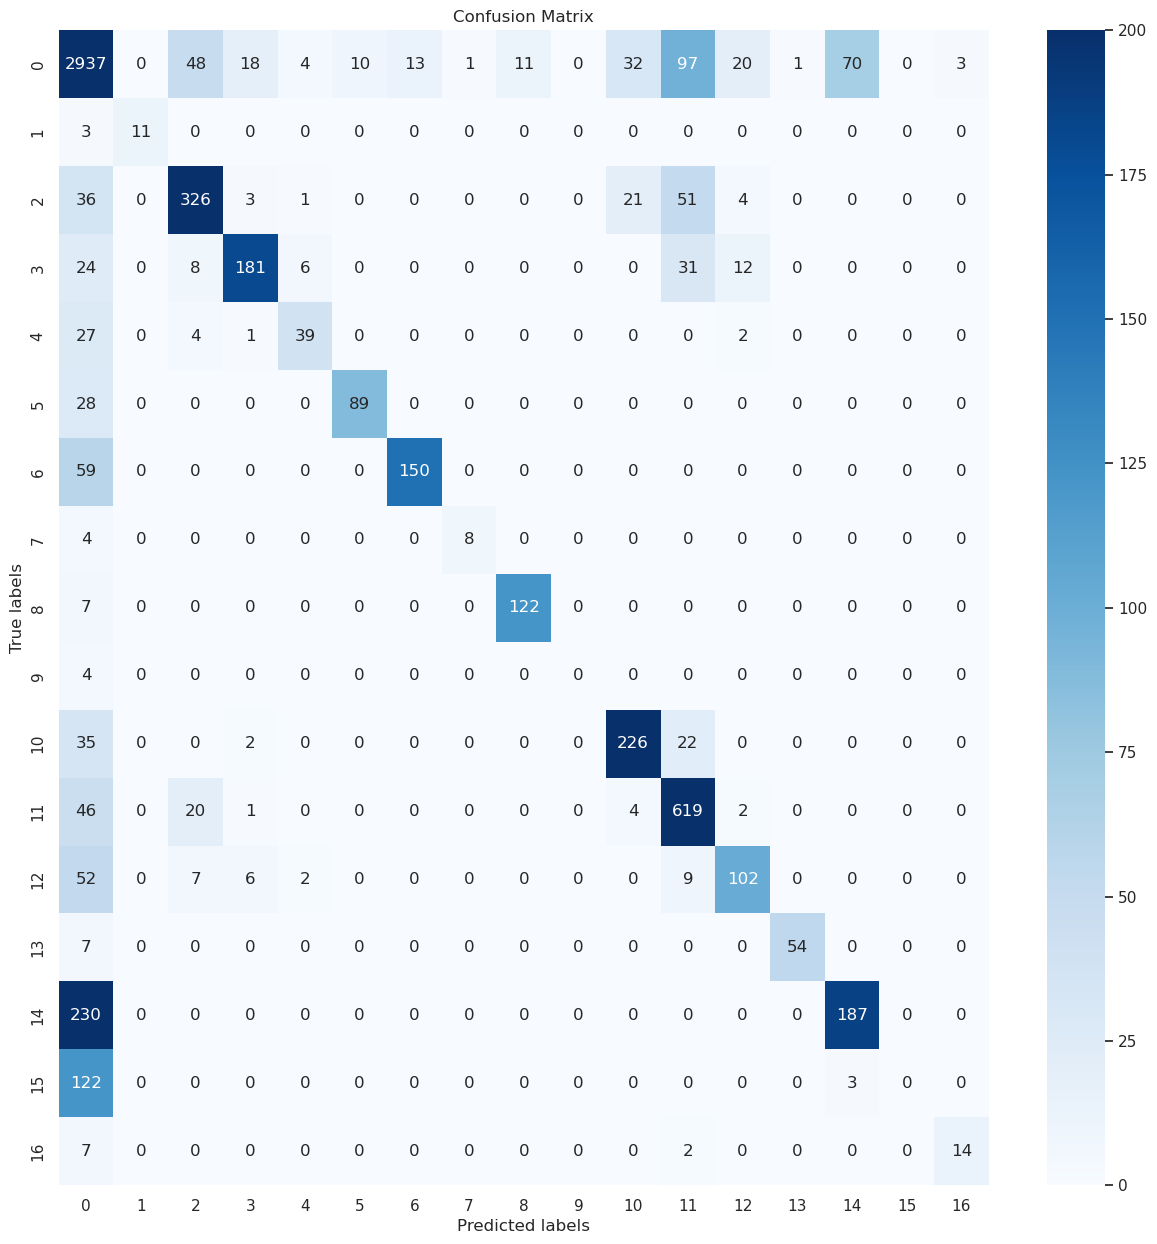

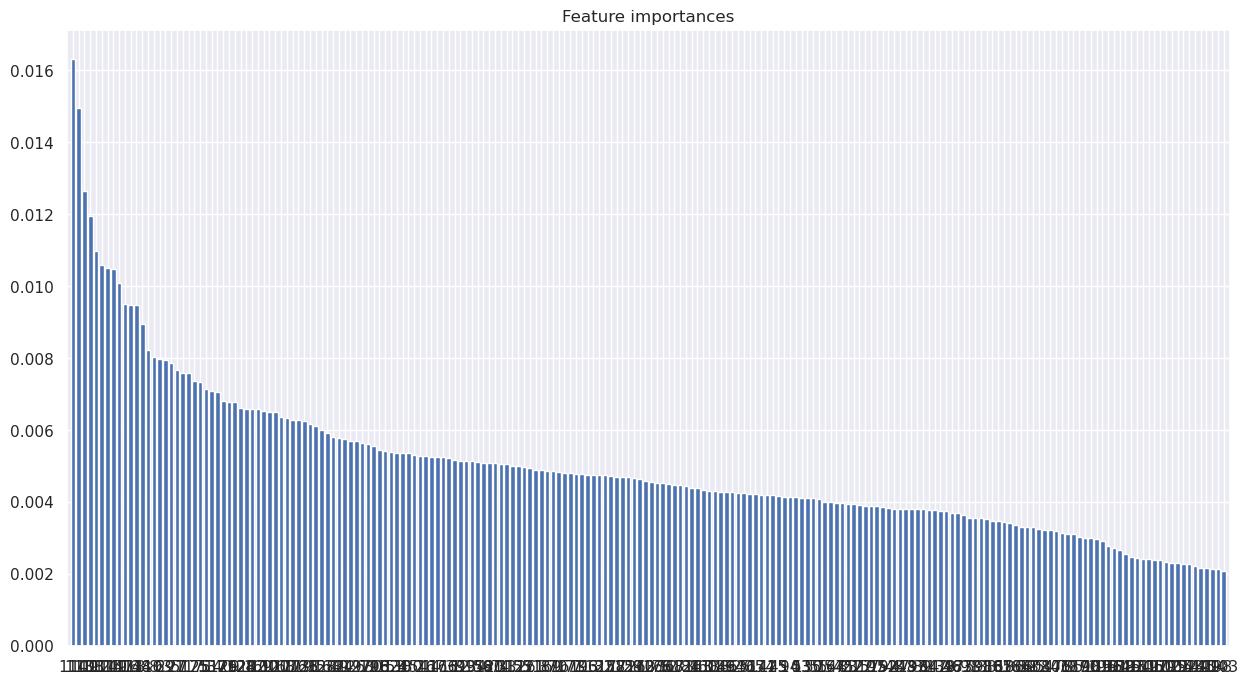

Top 10 important bands:
Band 114: 0.016311346361359058
Band 113: 0.01495837695285076
Band 109: 0.012649608407892764
Band 108: 0.011956729679906252
Band 112: 0.010980477552577955
Band 111: 0.01058949839872985
Band 115: 0.010506019098839163
Band 149: 0.010486553609099874
Band 147: 0.010099638019442927
Band 116: 0.009509184990312461


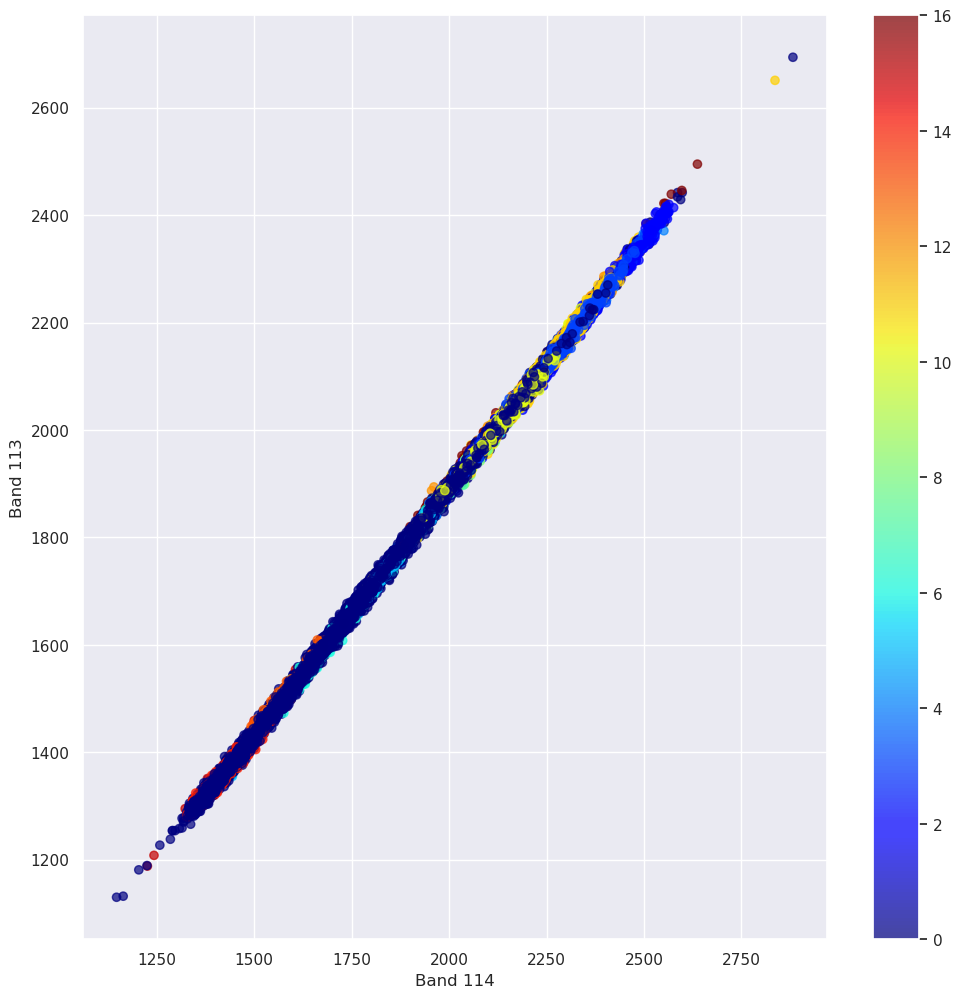

In [5]:
    # 绘制随机波段的特征
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(data.shape[2])
    plt.imshow(data[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()
    
    # 绘制标签
    plt.figure(figsize=(8, 6))
    plt.imshow(labels, cmap='jet')
    plt.axis('off')
    plt.colorbar(ticks= range(0,16))
    plt.title("Labels")
    plt.show()
    
    # 绘制混淆矩阵图
    plt.figure(figsize=(15, 15))
    sns.set(font_scale=1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues', vmin=0, vmax=200)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # 可视化每个波段的重要性
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(15, 8))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

    # 显示前10个最重要的波段
    print("Top 10 important bands:")
    for i in range(10):
        print(f"Band {indices[i]}: {importances[indices[i]]}")

    # 可视化前两个波段的散点图
    plt.figure(figsize=(12, 12))
    plt.scatter(X[:, indices[0]], X[:, indices[1]], c=y, cmap='jet', alpha=0.7)
    plt.colorbar()
    plt.xlabel(f"Band {indices[0]}")
    plt.ylabel(f"Band {indices[1]}")
    plt.show()

In [6]:
# if __name__ == '__main__':
#     # 读取数据
#     data, labels = LoadData()
#     # 数据预处理
#     data = data.reshape(-1, 200)
#     labels = labels.reshape(-1, )

#     X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
    
#     # 使用HalvingGridSearchCV进行超参数优化
#     params = {
#         'n_estimators': [50, 100, 200, 500],
#         'max_features': [5, 10, 15, 20, 30, 40],
#         'max_depth': [5, 10, 20, 30, None],
#         'min_samples_split': [2, 5, 10, 20],
#         'min_samples_leaf': [1, 2, 4]
#     }
#     clf = RandomForestClassifier()
#     search = HalvingGridSearchCV(clf, params, cv=3, factor=3, min_resources='exhaust',
#                                  max_resources=300, verbose=3, n_jobs=-1, scoring='accuracy')
#     search.fit(X_train, y_train)

#     # 输出最佳参数和测试集准确率
#     best_params = search.best_params_
#     print('Best parameters:', best_params)
#     clf = RandomForestClassifier(**best_params)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print('Test accuracy:', acc)
#     # 可视化参数搜索过程
#     fig, ax = plt.subplots()
#     ax.plot(search.cv_results_['mean_test_score'])
#     ax.fill_between(range(len(params['n_estimators'])), search.cv_results_['mean_test_score'] -
#                     search.cv_results_['std_test_score'], search.cv_results_['mean_test_score'] +
#                     search.cv_results_['std_test_score'], alpha=0.1)
#     ax.set_xticks(range(len(params['n_estimators'])))
#     ax.set_xticklabels(params['n_estimators'])
#     ax.set_xlabel('n_estimators')
#     ax.set_ylabel('accuracy')
#     plt.show()